In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows', None)
#test change

In [4]:
apikey = 'af4a7c461bcda111515e0ebeea5e4124fcc267d6'
get = 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F'
#removed non labled versions of rows
url = f"https://api.census.gov/data/2018/abscs?get={get}&for=us:*&key={apikey}"
print(url)

https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*&key=af4a7c461bcda111515e0ebeea5e4124fcc267d6


In [5]:
#get=GEO_ID,NAME,EMP,NATION,PAYANN,STATE,YEAR
apikey = 'af4a7c461bcda111515e0ebeea5e4124fcc267d6'
get = 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F'
#removed non labled versions of rows
url = f"https://api.census.gov/data/2018/abscs?get={get}&for=us:*&key={apikey}"
stateurl = url = f"https://api.census.gov/data/2018/abscs?get={get}&for=state:*&key={apikey}"

r = requests.get(url)
print(r)
stater = requests.get(stateurl)
print(stater)

r = r.json()
r = json.dumps(r)

stater = stater.json()
stater = json.dumps(stater)

<Response [200]>
<Response [200]>


In [25]:

p = pd.read_json(r)
p.head(10)

headers = p.iloc[0]
new_p  = pd.DataFrame(p.values[1:], columns=headers)
#remove columns we don't need
new_p = new_p.drop(columns =['SEX', 'ETH_GROUP', 'RACE_GROUP', 'VET_GROUP', 'EMPSZFI', 'FIRMPDEMP_S_F', 'PAYANN_S_F', 'YEAR','RCPPDEMP_S_F', 'FIRMPDEMP_F', 'RCPPDEMP_F', 'EMP_F', 'EMP_S_F'])
usadata = new_p.rename({"NAICS2017_LABEL": "Industry", 
                    "SEX_LABEL": "Sex",
                    "FIRMPDEMP": "EmpFirms",
                    "ETH_GROUP_LABEL": "Eth", 
                    "RACE_GROUP_LABEL": "Race", 
                    "VET_GROUP_LABEL": "Vet", 
                    "EMPSZFI_LABEL": "EMPSZFI"}, 
                    axis='columns')

usadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261397 entries, 0 to 261396
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   GEO_ID       261397 non-null  object
 1   NAME         261397 non-null  object
 2   NAICS2017    261397 non-null  object
 3   Industry     261397 non-null  object
 4   Sex          261397 non-null  object
 5   Eth          261397 non-null  object
 6   Race         261397 non-null  object
 7   Vet          261397 non-null  object
 8   EMPSZFI      261397 non-null  object
 9   EmpFirms     261397 non-null  object
 10  RCPPDEMP     261397 non-null  object
 11  EMP          261397 non-null  object
 12  PAYANN       261397 non-null  object
 13  PAYANN_F     171599 non-null  object
 14  FIRMPDEMP_S  261397 non-null  object
 15  RCPPDEMP_S   261397 non-null  object
 16  EMP_S        261397 non-null  object
 17  PAYANN_S     261397 non-null  object
 18  state        261397 non-null  object
dtypes:

In [19]:

statedatap = pd.read_json(stater)
statedatap.head(10)

headers = statedatap.iloc[0]
statedata  = pd.DataFrame(statedatap.values[1:], columns=headers)
#remove columns we don't need
statedata = statedata.drop(columns =['ETH_GROUP', 'RACE_GROUP', 'VET_GROUP', 'EMPSZFI', 'FIRMPDEMP_S_F', 'PAYANN_S_F', 'YEAR','RCPPDEMP_S_F','EMP_S_F', 'FIRMPDEMP_F'])
statedata = statedata.rename({"NAICS2017_LABEL": "Industry",
                    "SEX_LABEL": "Sex",  
                    "ETH_GROUP_LABEL": "Eth", 
                    "FIRMPDEMP": "EmpFirms", 
                    "RACE_GROUP_LABEL": "Race", 
                    "VET_GROUP_LABEL": "Vet", 
                    "EMPSZFI_LABEL": "EMPSZFI"}, 
                    axis='columns')
statedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261397 entries, 0 to 261396
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   GEO_ID       261397 non-null  object
 1   NAME         261397 non-null  object
 2   NAICS2017    261397 non-null  object
 3   Industry     261397 non-null  object
 4   SEX          261397 non-null  object
 5   Sex          261397 non-null  object
 6   Eth          261397 non-null  object
 7   Race         261397 non-null  object
 8   Vet          261397 non-null  object
 9   EMPSZFI      261397 non-null  object
 10  EmpFirms     261397 non-null  object
 11  RCPPDEMP     261397 non-null  object
 12  RCPPDEMP_F   261397 non-null  object
 13  EMP          261397 non-null  object
 14  EMP_F        171599 non-null  object
 15  PAYANN       261397 non-null  object
 16  PAYANN_F     171599 non-null  object
 17  FIRMPDEMP_S  261397 non-null  object
 18  RCPPDEMP_S   261397 non-null  object
 19  EM

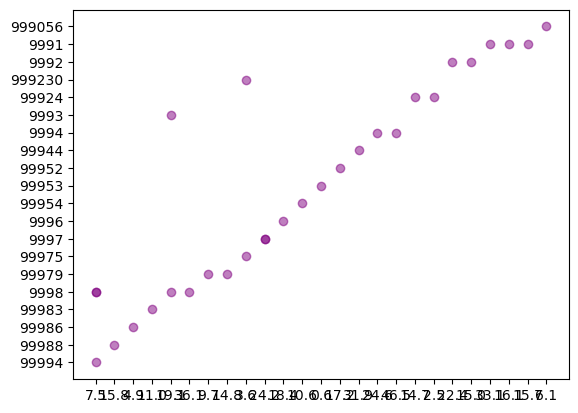

In [16]:
topemp = usadata[['EMP','EMP_S','PAYANN',]].sort_values(by = 'EMP', ascending=False)[:30]
topemp[['EMP','EMP_S','PAYANN']]
plt.scatter(y = topemp['EMP'],  # x-axis data
            x = topemp['EMP_S'],    # y-axis data
            #marker = 'x',            # shape of point 
            alpha = .5,             # color scale to denote frequency (alpha = 1 <=> same color for everything)
            color = 'purple');

In [20]:
statecount = statedata[['NAME','EmpFirms', 'Industry']]
statecount['EmpFirms'] = statecount['EmpFirms'].astype('int')
#statecount = statedata.groupby('NAME').size().reset_index(name='count')
statecount = statecount[(statecount['Industry']=='Professional, scientific, and technical services')]
statecount = statecount.groupby(['NAME'], as_index=False)['EmpFirms'].sum()

statecount.sort_values(by='EmpFirms', ascending=False, inplace=True)
statecount.rename(columns={'EmpFirms': 'Science'}, inplace=True)

statecount.head(100)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_18480\427840339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statecount['EmpFirms'] = statecount['EmpFirms'].astype('int')


,NAME,Science
4,California,2969350
9,Florida,1906104
43,Texas,1592296
32,New York,1454819
13,Illinois,908842
10,Georgia,686159
38,Pennsylvania,665825
46,Virginia,654986
30,New Jersey,641779
33,North Carolina,580373


In [21]:
statecountu = statedata[['NAME','EmpFirms', 'Industry']]
statecountu['EmpFirms'] = statecountu['EmpFirms'].astype('int')
#statecount = statedata.groupby('NAME').size().reset_index(name='count')
statecountu = statecountu[(statecountu['Industry']=='Manufacturing')]
statecountu = statecountu.groupby(['NAME'], as_index=False)['EmpFirms'].sum()
statecountu.sort_values(by='EmpFirms', ascending=False, inplace=True)
statecountu.rename(columns={'EmpFirms': 'Manufacturing'}, inplace=True)

statecountu.head(100)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_18480\411372168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statecountu['EmpFirms'] = statecountu['EmpFirms'].astype('int')


,NAME,Manufacturing
4,California,862550
43,Texas,413788
32,New York,356269
9,Florida,310586
38,Pennsylvania,284655
35,Ohio,283924
13,Illinois,275450
49,Wisconsin,175302
33,North Carolina,174790
30,New Jersey,167079


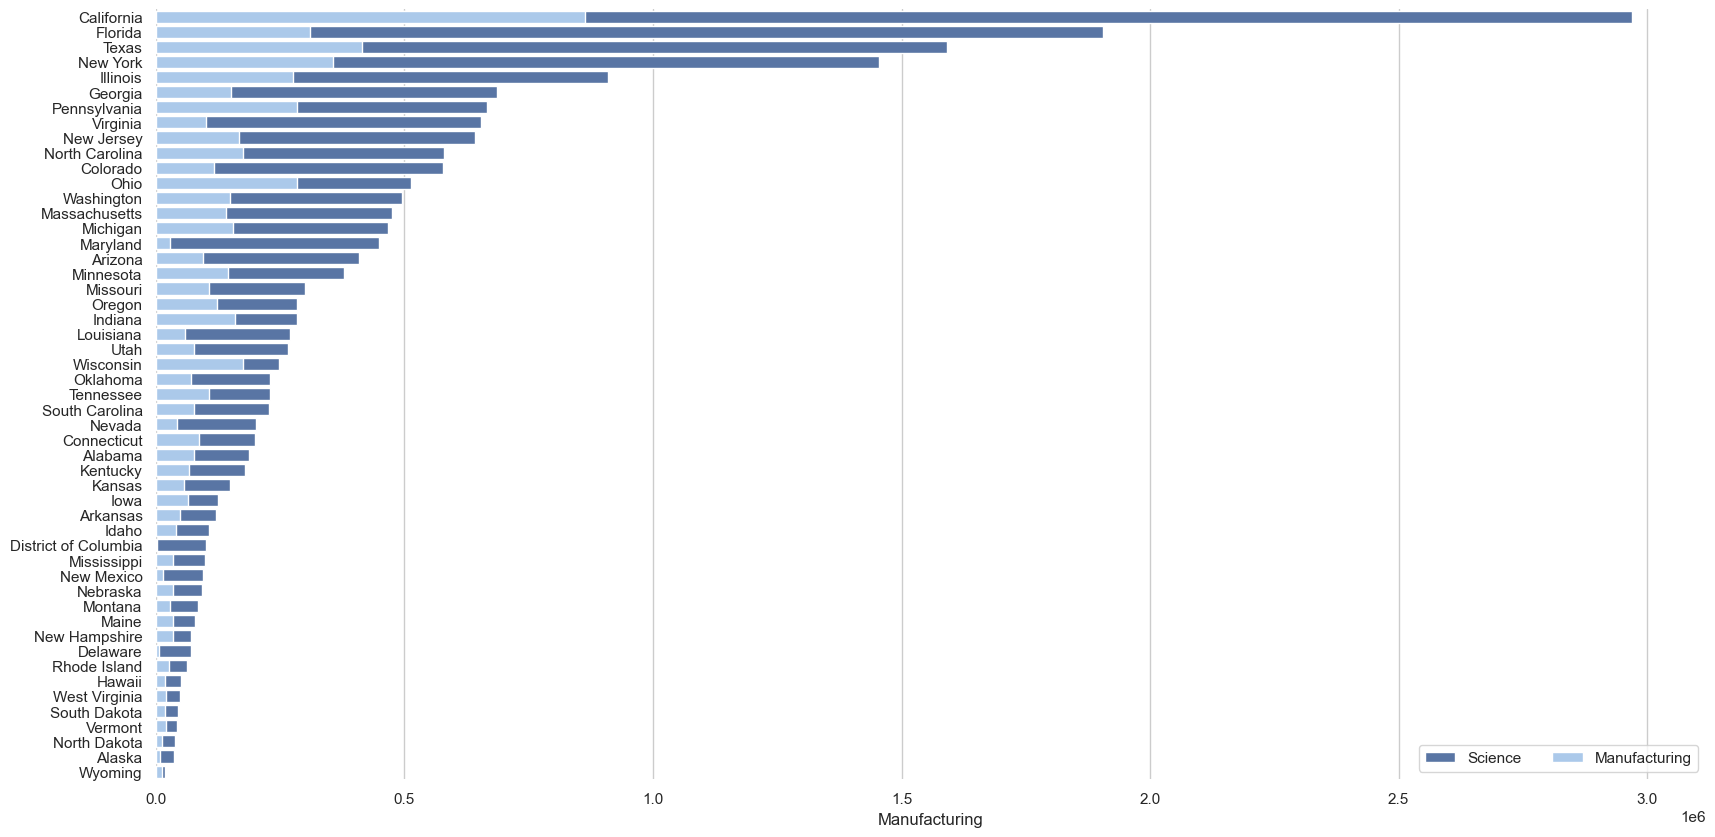

In [22]:
statecategoriesjoin = pd.merge(statecountu, statecount, on='NAME')
statecategoriesjoin.sort_values(by='Science', ascending=False, inplace=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(20,10))
sns.set_color_codes("deep")
sns.barplot(x="Science", y="NAME", data=statecategoriesjoin,
            label="Science", color="b")    
sns.set_color_codes("pastel")
sns.barplot(x="Manufacturing", y="NAME", data=statecategoriesjoin,
            label="Manufacturing", color="b")
      
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="")
sns.despine(left=True, bottom=True)

In [26]:
firmus = usadata[['EmpFirms','Sex']]
firmus['EmpFirms'] = firmus['EmpFirms'].astype('int')
firmus = firmus[(firmus['Sex']=='Female')|(firmus['Sex']=='Male')]
firmus = firmus.groupby(['Sex'], as_index=False)['EmpFirms'].sum()
firmus


C:\Users\Daniel\AppData\Local\Temp\ipykernel_18480\4127512238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firmus['EmpFirms'] = firmus['EmpFirms'].astype('int')


,Sex,EmpFirms
0,Female,22794065
1,Male,74856729


<BarContainer object of 20 artists>

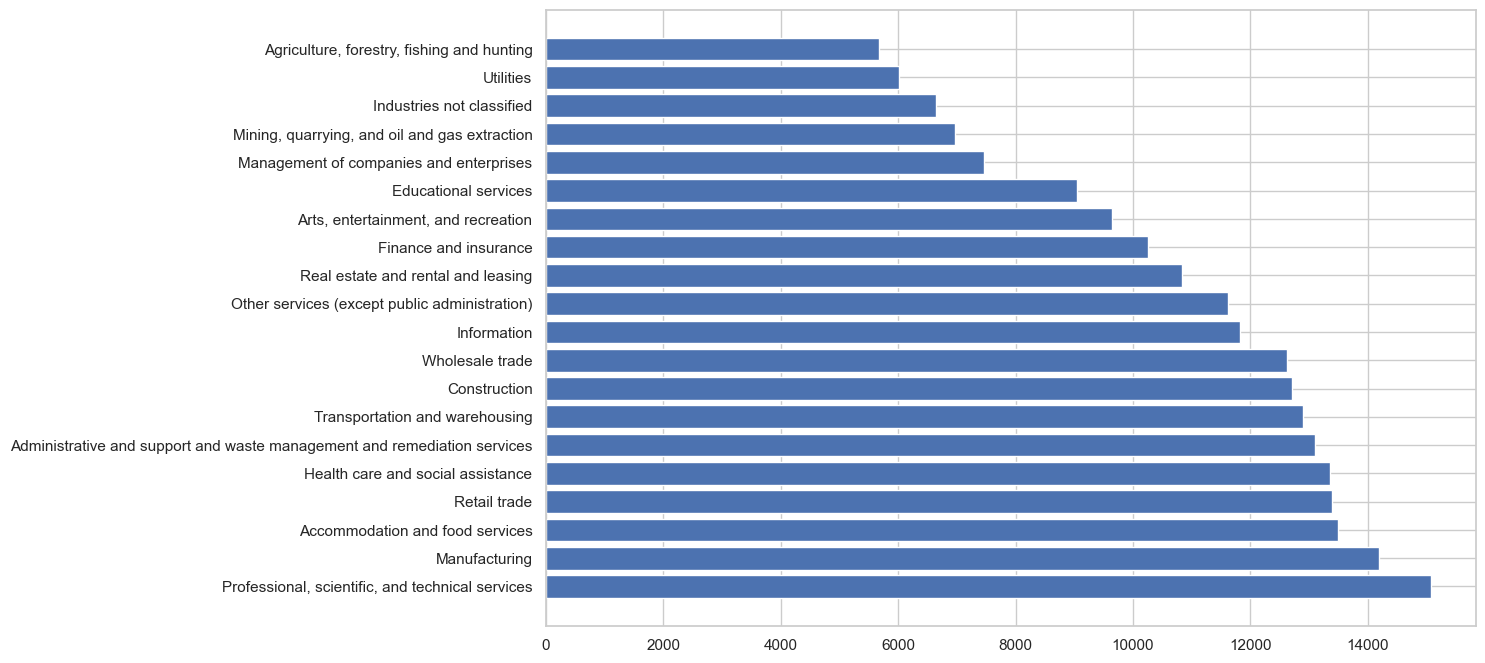

In [38]:
itotal = usadata[['Industry']]
itotal = itotal.groupby('Industry').size().reset_index(name='count')
itotal.sort_values(by='count', ascending=False, inplace=True)
itotal = itotal[(itotal['Industry']!='Total for all sectors')]

plt.figure(figsize = (12, 8))
#barplot
plt.barh(y = itotal['Industry'], width = itotal['count'])

In [36]:
smalltestagain

,Industry,count
14,"Professional, scientific, and technical services",15082
11,Manufacturing,14192
0,Accommodation and food services,13483
16,Retail trade,13382
7,Health care and social assistance,13350
1,Administrative and support and waste managemen...,13101
18,Transportation and warehousing,12894
4,Construction,12716
20,Wholesale trade,12620
9,Information,11821
